In [791]:
import matplotlib.pyplot as plt         
import numpy as np

class Particle(object):
    def __init__(self, m=1, x0=1.0, vx0=0.0, y0=1.0, vy0=0.0, z0=1.0, vz0=0.0,  tf = 10.0, dt = 0.001):
        self.m = m
        self.x = x0
        self.vx = vx0
        self.y = y0
        self.vy = vy0
        self.z=z0
        self.vz=vz0
        self.t = 0.0
        self.tf = tf
        self.dt = dt

        npoints = int(tf/dt) 
        self.npoints = npoints
        self.tarray = np.linspace(0.0, tf,npoints, endpoint = True) 
        self.xv0 = np.array([self.x, self.vx]) 
        self.yv0 = np.array([self.y, self.vy])
        self.zv0 = np.array([self.z, self.vz])
        
    def Fx(self, x, vx, y, vy, z, vz, t):
        return 0
    
    def Fy(self, x, vx, y, vy, z, vz, t):
        return 0
    
    def Fz(self, x, vx, y, vy, z, vz, t):
        return 0

    def RK4_step(self):
        ax1 = self.Fx(self.x, self.vx, self.y, self.vy, self.z, self.vz, self.t) / self.m
        kx1 = np.array([self.vx, ax1])*self.dt
        ay1 = self.Fy(self.x, self.vx, self.y, self.vy, self.z, self.vz, self.t) / self.m
        ky1 = np.array([self.vy, ay1])*self.dt
        az1 = self.Fz(self.x, self.vx, self.y, self.vy, self.z, self.vz, self.t) / self.m
        kz1 = np.array([self.vz, az1])*self.dt

        ax2 = self.Fx(self.x+kx1[0]/2, self.vx+kx1[1]/2,self.y, self.vy, self.z, self.vz, self.t+self.dt/2) / self.m
        kx2 = np.array([self.vx+kx1[1]/2 ,ax2])*self.dt
        ay2 = self.Fy(self.x, self.vx,self.y+ky1[0]/2, self.vy+ky1[1]/2, self.z, self.vz, self.t+self.dt/2) / self.m
        ky2 = np.array([self.vy+ky1[1]/2 ,ay2])*self.dt
        az2 = self.Fz(self.x, self.vx,self.y, self.vy, self.z+kz1[0]/2, self.vz+kz1[1]/2, self.t+self.dt/2) / self.m
        kz2 = np.array([self.vz+kz1[1]/2 ,az2])*self.dt
        
        ax3 = self.Fx(self.x+kx2[0]/2, self.vx+kx2[1]/2, self.y, self.vy, self.z, self.vz, self.t+self.dt/2) / self.m
        kx3 = np.array([self.vx+kx2[1]/2, ax3])*self.dt
        ay3 = self.Fy(self.x, self.vx, self.y+ky2[0]/2, self.vy+ky2[1]/2, self.z, self.vz, self.t+self.dt/2) / self.m
        ky3 = np.array([self.vy+ky2[1]/2, ay3])*self.dt
        az3 = self.Fz(self.x, self.vx, self.y, self.vy, self.z+kz2[0]/2, self.vz+ky2[1]/2, self.t+self.dt/2) / self.m
        kz3 = np.array([self.vz+kz2[1]/2, az3])*self.dt
        
        ax4 = self.Fx(self.x+kx3[0], self.vx+kx3[1], self.y, self.vy, self.z, self.vz, self.t+self.dt) / self.m
        kx4 = np.array([self.vx+kx3[1], ax4])*self.dt
        ay4 = self.Fy(self.x, self.vx, self.y+ky3[0], self.vy+ky3[1], self.z, self.vz, self.t+self.dt) / self.m
        ky4 = np.array([self.vy+ky3[1], ay4])*self.dt
        az4 = self.Fz(self.x, self.vx, self.y, self.vy, self.z+kz3[0], self.vz+kz3[1], self.t+self.dt) / self.m
        kz4 = np.array([self.vz+kz3[1], az4])*self.dt

        self.x += (kx1[0]+ kx4[0])/6 + (kx2[0] + kx3[0])/3
        self.vx += (kx1[1]+ kx4[1])/6 + (kx2[1] + kx3[1])/3
        self.y += (ky1[0]+ ky4[0])/6 + (ky2[0] + ky3[0])/3
        self.vy += (ky1[1]+ ky4[1])/6 + (ky2[1] + ky3[1])/3
        self.z += (kz1[0]+ kz4[0])/6 + (kz2[0] + kz3[0])/3
        self.vz += (kz1[1]+ kz4[1])/6 + (kz2[1] + kz3[1])/3
        
        self.t += self.dt
   
    def RK4_trajectory(self): 
        
        x_RK4 = []
        vx_RK4 = []
        y_RK4 = []
        vy_RK4 = []
        z_RK4 = []
        vz_RK4 = []
        t_RK4 = []
        
        while(self.t < self.tf - self.dt/2):
            if (self.x<0):
                self.x_RK4 = np.array(x_RK4)
                self.vx_RK4 = np.array(vx_RK4)
                self.y_RK4 = np.array(y_RK4)
                self.vy_RK4 = np.array(vy_RK4)
                self.z_RK4 = np.array(z_RK4)
                self.vz_RK4 = np.array(vz_RK4)
                self.t_RK4 = np.array(t_RK4)
                return
            else:
                x_RK4.append(self.x)
                vx_RK4.append(self.vx)
                y_RK4.append(self.y)
                vy_RK4.append(self.vy)
                z_RK4.append(self.z)
                vz_RK4.append(self.vz)
                t_RK4.append(self.t)
                self.RK4_step()

        self.x_RK4 = np.array(x_RK4)
        self.vx_RK4 = np.array(vx_RK4)
        self.y_RK4 = np.array(y_RK4)
        self.vy_RK4 = np.array(vy_RK4)
        self.z_RK4 = np.array(z_RK4)
        self.vz_RK4 = np.array(vz_RK4)
        self.t_RK4 = np.array(t_RK4)

    def plot(self):
        fig1 = plt.figure(figsize = [14,6])
        ax1 = fig1.subplots(1,2)
        
        fig2 = plt.figure(figsize = [14,6])
        ax2 = fig2.subplots(1,2)

        ax1[0].plot(self.t_RK4, self.x_RK4, "b", label = 'x')
        ax1[1].plot(self.t_RK4, self.y_RK4, "r", label = 'y')
        ax1[0].grid(ls='--');ax1[1].grid(ls='--')
        ax2[0].plot(self.t_RK4, self.vx_RK4, "b", label = 'vx')
        ax2[1].plot(self.t_RK4, self.vy_RK4, "r", label = 'vy')
        ax2[0].grid(ls='--');ax2[1].grid(ls='--')
            
        ax1[0].set_title('Trajectory')
        ax1[0].set_xlabel("time")
        ax1[0].set_ylabel("xdistance")
        ax1[1].set_title('Trajectory')
        ax1[1].set_xlabel("time")
        ax1[1].set_ylabel("ydistance")
        
        ax2[0].set_title('Velocity')
        ax2[0].set_xlabel("time")
        ax2[0].set_ylabel("xvelocitye")
        ax2[1].set_title('Velocity')
        ax2[1].set_xlabel("time")
        ax2[1].set_ylabel("yvelocity")

        ax1[0].legend();ax1[1].legend()
        ax2[0].legend();ax2[1].legend()


**Problem 1(a)**

In [566]:
#Prob1
class Problem1(Particle):
    def __init__(self,m=10,x0=0,vx0=100,y0=0,vy0=100,z0=0,vz0=0, tf=3000,dt=0.1,rou0=1.25,a=0.0065,T0=285,alpha=2.5,Cd=0.5):
        #vx is the vertical velocity, vy takes the particle away from origin
        #rou0 is chosen to be 1
        self.A=0.01
        self.rou0=rou0
        self.a=a 
        self.T0=T0
        self.alpha=alpha
        self.Cd=Cd
        super().__init__(m,x0,vx0,y0,vy0,z0,vz0,tf,dt)
        
    def rou(self,x):
        X=x
        num1=self.rou0*(1-self.a*X/self.T0)**self.alpha
        return num1
    
    def Fx(self, x, vx, y, vy, z, vz, t):
        num2=-0.5*self.Cd*self.rou(x)*self.A*vx**2-self.m*9.8
        return num2
    
    def Fy(self, x, vx, y, vy, z, vz, t):
        num3=-0.5*self.Cd*self.rou(x)*self.A*vy**2
        return num3


In [567]:
v_launch=1000
theta_r=np.linspace(0,np.pi/2,50,endpoint=True)
y_max1=0
theta_max1=0
y_max2=0
theta_max2=0
y_max3=0
theta_max3=0
for i in range(50):
    v1=v_launch*np.sin(theta_r[i])
    v2=v_launch*np.cos(theta_r[i])
    pro14=Problem1(x0=0,vx0=v1,vy0=v2)
    pro14.RK4_trajectory()
    if (np.max(pro14.y_RK4)>y_max1):
        y_max1=np.max(pro14.y_RK4)
        theta_max1=theta_r[i]
for i in range(50):
    v1=v_launch*np.sin(theta_r[i])
    v2=v_launch*np.cos(theta_r[i])
    pro15=Problem1(x0=0,vx0=v1,vy0=v2,a=0)
    pro15.RK4_trajectory()
    if (np.max(pro15.y_RK4)>y_max2):
        y_max2=np.max(pro15.y_RK4)
        theta_max2=theta_r[i]
for i in range(50):
    v1=v_launch*np.sin(theta_r[i])
    v2=v_launch*np.cos(theta_r[i])
    pro16=Problem1(x0=0,vx0=v1,vy0=v2,a=0,rou0=0)
    pro16.RK4_trajectory()
    if (np.max(pro16.y_RK4)>y_max3):
        y_max3=np.max(pro16.y_RK4)
        theta_max3=theta_r[i]

Maximum ranges for different model:

In [536]:
print('adiabatic model maximum y:',y_max1,'; adiabatic model maximum theta:',theta_max1)
print('constant model maximum y:',y_max2,'; constant model maximum theta:',theta_max2)
print('no resistance model maximum y:',y_max3,'; no resistance model maximum theta:',theta_max3)

adiabatic model maximum y: 9019.358487265783 ; adiabatic model maximum theta: 0.6090842899816945
constant model maximum y: 8220.663712586509 ; constant model maximum theta: 0.48085601840660097
no resistance model maximum y: 101987.06191847145 ; no resistance model maximum theta: 0.8014266973443349


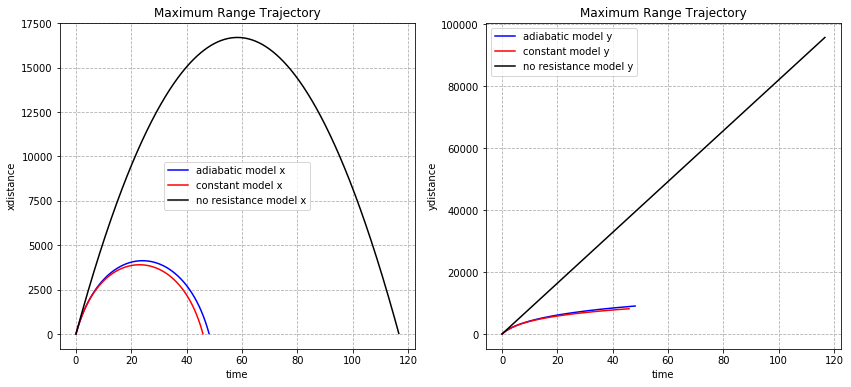

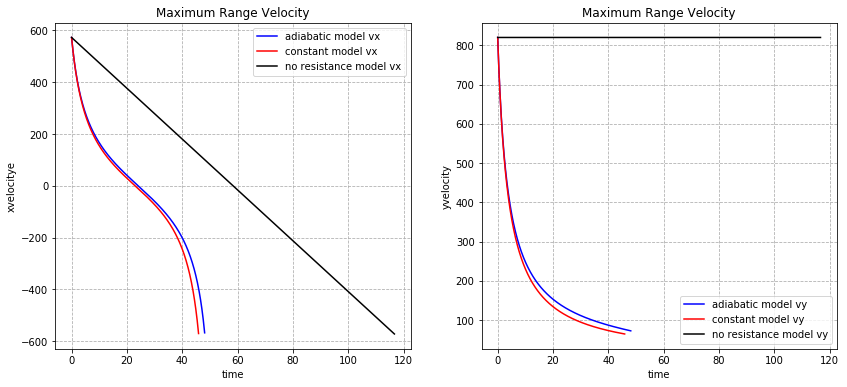

In [537]:
theta=[theta_max1,theta_max2,theta_max3]

fig1 = plt.figure(figsize = [14,6])
ax1 = fig1.subplots(1,2)
fig2 = plt.figure(figsize = [14,6])
ax2 = fig2.subplots(1,2)
v11=v_launch*np.sin(theta[0])
v21=v_launch*np.cos(theta[0])
v12=v_launch*np.sin(theta[0])
v22=v_launch*np.cos(theta[0])
v13=v_launch*np.sin(theta[0])
v23=v_launch*np.cos(theta[0])
pro11=Problem1(x0=0,vx0=v11,vy0=v21);
pro11.RK4_trajectory();
pro12=Problem1(x0=0,vx0=v12,vy0=v22,a=0);
pro12.RK4_trajectory();
pro13=Problem1(x0=0,vx0=v13,vy0=v23,a=0,rou0=0);
pro13.RK4_trajectory();

ax1[0].plot(pro11.t_RK4, pro11.x_RK4, "b", label = "adiabatic model x" )
ax1[1].plot(pro11.t_RK4, pro11.y_RK4, "b", label = "adiabatic model y")
ax2[0].plot(pro11.t_RK4, pro11.vx_RK4, "b", label = "adiabatic model vx")
ax2[1].plot(pro11.t_RK4, pro11.vy_RK4, "b", label = "adiabatic model vy ")
ax1[0].grid(ls='--')
ax1[1].grid(ls='--')
ax2[0].grid(ls='--')
ax2[1].grid(ls='--')

ax1[0].plot(pro12.t_RK4, pro12.x_RK4, "r", label = "constant model x")
ax1[1].plot(pro12.t_RK4, pro12.y_RK4, "r", label = "constant model y")
ax2[0].plot(pro12.t_RK4, pro12.vx_RK4, "r", label = "constant model vx")
ax2[1].plot(pro12.t_RK4, pro12.vy_RK4, "r", label = "constant model vy")

ax1[0].plot(pro13.t_RK4, pro13.x_RK4, "k", label = "no resistance model x")
ax1[1].plot(pro13.t_RK4, pro13.y_RK4, "k", label = "no resistance model y")
ax2[0].plot(pro13.t_RK4, pro13.vx_RK4, "k", label = "no resistance model vx")
ax2[1].plot(pro13.t_RK4, pro13.vy_RK4, "k", label = "no resistance model vy")
            
ax1[0].set_title('Maximum Range Trajectory')
ax1[0].set_xlabel("time")
ax1[0].set_ylabel("xdistance")
ax1[1].set_title('Maximum Range Trajectory')
ax1[1].set_xlabel("time")
ax1[1].set_ylabel("ydistance")
        
ax2[0].set_title('Maximum Range Velocity')
ax2[0].set_xlabel("time")
ax2[0].set_ylabel("xvelocitye")
ax2[1].set_title('Maximum Range Velocity')
ax2[1].set_xlabel("time")
ax2[1].set_ylabel("yvelocity")

ax1[0].legend();ax1[1].legend()
ax2[0].legend();ax2[1].legend()

Here we set $\rho_0=1.25$, which is from Wiki, and $T_0=285K$, about 10 degree.
From the figures above, we can infer that the existence of air resistance will significantly decrease the maximum range of the projectile. Moreover, altitude related resistance will have smaller value at higher position, thus lead to larger range, about $7km$ farther, and larger maximum launch angle when compared with constant resistance one, which is $0.1938\pi$ rather than $0.1531\pi$.

**Problem 1(b)**

In [550]:
class Problem1b(Particle):
    def __init__(self,m=10,x0=0,vx0=100,y0=0,vy0=100, z0=0,vz0=0,tf=3000,dt=0.1,R=6400000,g=9.8):
        #vx is the vertical velocity, vy takes the particle away from origin
        self.g=g
        self.R=R
        super().__init__(m,x0,vx0,y0,vy0,z0,vz0,tf,dt)   
    
    def Fx(self, x, vx, y, vy,z, vz, t):
        num2=-self.m*self.g*(1-x/(x+self.R))**2
        return num2
    
    def Fy(self, x, vx, y, vy,z, vz, t):
        num3=0
        return num3

class Problem1b2(Particle):
    def __init__(self,m=10,x0=0,vx0=100,y0=0,vy0=100,z0=0,vz0=0,tf=3000,dt=0.1,g=9.8):
        #vx is the vertical velocity, vy takes the particle away from origin
        self.g=g
        super().__init__(m,x0,vx0,y0,vy0,z0,vz0,tf,dt)   
    
    def Fx(self, x, vx, y, vy, z, vz, t):
        num2=-self.m*self.g
        return num2
    
    def Fy(self, x, vx, y, vy, z, vz, t):
        num3=0
        return num3

In [551]:
v_lau=5000
th_r=np.linspace(0,np.pi/2,50,endpoint=True)
h_max1=0
th_max1=0
h_max2=0
th_max2=0
for i in range(50):
    v1=v_lau*np.sin(th_r[i])
    v2=v_lau*np.cos(th_r[i])
    prob1=Problem1b(x0=0,vx0=v1,vy0=v2)
    prob1.RK4_trajectory()
    if (np.max(prob1.y_RK4)>h_max1):
        h_max1=np.max(prob1.y_RK4)
        th_max1=th_r[i]
for i in range(50):
    v1=v_lau*np.sin(th_r[i])
    v2=v_lau*np.cos(th_r[i])
    prob12=Problem1b2(x0=0,vx0=v1,vy0=v2)
    prob12.RK4_trajectory()
    if (np.max(prob12.y_RK4)>h_max2):
        h_max2=np.max(prob12.y_RK4)
        th_max2=th_r[i]

In [552]:
print('varying g max y:',h_max1,'; varying g max theta:',th_max1)
print('constant g max y:',h_max2,'; constantg g max theta:',th_max2)

varying g max y: 2968237.8221141645 ; varying g max theta: 0.8655408331318817
constant g max y: 2549676.547961897 ; constantg g max theta: 0.8014266973443349


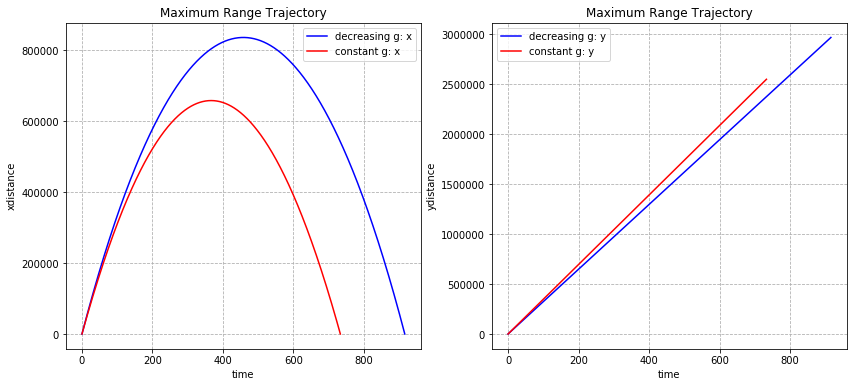

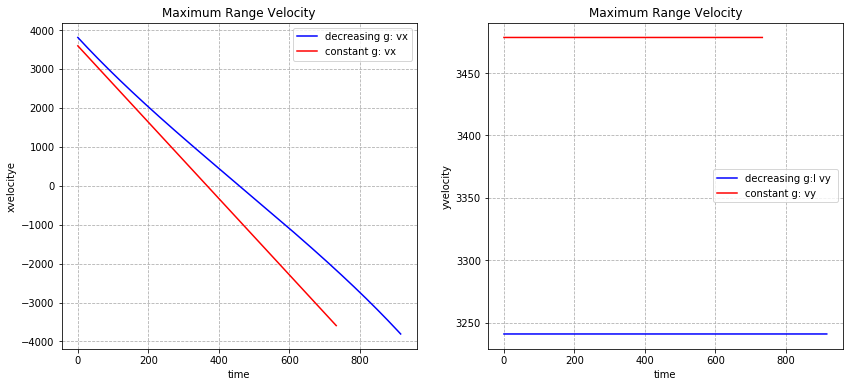

In [553]:
fig1 = plt.figure(figsize = [14,6])
ax1 = fig1.subplots(1,2)
fig2 = plt.figure(figsize = [14,6])
ax2 = fig2.subplots(1,2)

vx01=v_lau*np.sin(th_max1)
vy01=v_lau*np.cos(th_max1)
vx02=v_lau*np.sin(th_max2)
vy02=v_lau*np.cos(th_max2)

problem1b=Problem1b(x0=0,vx0=vx01,vy0=vy01)
problem1b.RK4_trajectory()
problem1b2=Problem1b2(x0=0,vx0=vx02,vy0=vy02)
problem1b2.RK4_trajectory()

ax1[0].plot(problem1b.t_RK4, problem1b.x_RK4, "b", label = "decreasing g: x" )
ax1[1].plot(problem1b.t_RK4, problem1b.y_RK4, "b", label = "decreasing g: y")
ax2[0].plot(problem1b.t_RK4, problem1b.vx_RK4, "b", label = "decreasing g: vx")
ax2[1].plot(problem1b.t_RK4, problem1b.vy_RK4, "b", label = "decreasing g:l vy ")
ax1[0].grid(ls='--')
ax1[1].grid(ls='--')
ax2[0].grid(ls='--')
ax2[1].grid(ls='--')

ax1[0].plot(problem1b2.t_RK4, problem1b2.x_RK4, "r", label = "constant g: x")
ax1[1].plot(problem1b2.t_RK4, problem1b2.y_RK4, "r", label = "constant g: y")
ax2[0].plot(problem1b2.t_RK4, problem1b2.vx_RK4, "r", label = "constant g: vx")
ax2[1].plot(problem1b2.t_RK4, problem1b2.vy_RK4, "r", label = "constant g: vy")
ax1[0].set_title('Maximum Range Trajectory')
ax1[0].set_xlabel("time")
ax1[0].set_ylabel("xdistance")
ax1[1].set_title('Maximum Range Trajectory')
ax1[1].set_xlabel("time")
ax1[1].set_ylabel("ydistance")
        
ax2[0].set_title('Maximum Range Velocity')
ax2[0].set_xlabel("time")
ax2[0].set_ylabel("xvelocitye")
ax2[1].set_title('Maximum Range Velocity')
ax2[1].set_xlabel("time")
ax2[1].set_ylabel("yvelocity")

ax1[0].legend();ax1[1].legend()
ax2[0].legend();ax2[1].legend()

From the expression of $g$, it is obvious that $g$ will decrease with altitude. Thus the varying gravity acceleration case will have larger maximum launch angle than constant gravity acceleration and of course larger range.

**Problem 2(a)**

In [579]:
#Prob2
class Problem2(Particle):
    def __init__(self,m=0.6,x0=140,vx0=0,y0=0,vy0=0,z0=0,vz0=0,tf=100,dt=0.01,vc=10,w=100,A=0.0457):
        self.a=0.25
        self.b=0.25
        self.c=0.16
        self.g=9.8
        self.rho=1.25
        self.T=300
        self.vc=vc
        self.w=w
        self.A=A
        self.r=np.sqrt(self.A/np.pi)
        super().__init__(m,x0,vx0,y0,vy0,z0,vz0,tf,dt)
        
    def Cd(self, x, vx, y, vy, v, vz, t):
        v=np.sqrt(self.vx**2+self.vy**2)
        kai=(v-self.vc)/4
        if (kai >=0):
            num1=self.a+self.b/(1+np.exp(kai))-self.c*np.exp(-kai**2/4)
            return num1
        else:
            num2=self.a+self.b/(1+np.exp(kai))-self.c*np.exp(-kai**2)
            return num2
        
    def CL(self, x, vx, y, vy, z, vz, t):
        v=np.sqrt(self.vx**2+self.vy**2)
        num3=0.5*(self.r*self.w/v)**0.4
        return num3
            
    def Fx(self, x, vx, y, vy, z, vz, t):
        v=np.sqrt(vx**2+vy**2)
        sin0=vy/v
        cos0=-vx/v
        Fd=0.5*self.Cd(x, vx, y, vy, z, vz, t)*self.rho*self.A*v
        FM=0.5*self.CL(x, vx, y, vy, z, vz, t)*self.rho*self.A*self.r/(self.r*self.w/v)*self.w*v 
        num3=-self.m*self.g+Fd*cos0+FM*sin0
        return num3
    
    def Fy(self, x, vx, y, vy, z, vz, t):
        v=np.sqrt(vx**2+vy**2)
        sin0=vy/v
        cos0=-vx/v
        Fd=0.5*self.Cd(x, vx, y, vy, z, vz, t)*self.rho*self.A*v
        FM=0.5*self.CL(x, vx, y, vy, z, vz, t)*self.rho*self.A*self.r/(self.r*self.w/v)*self.w*v 
        num4=-Fd*sin0+FM*cos0
        return num4


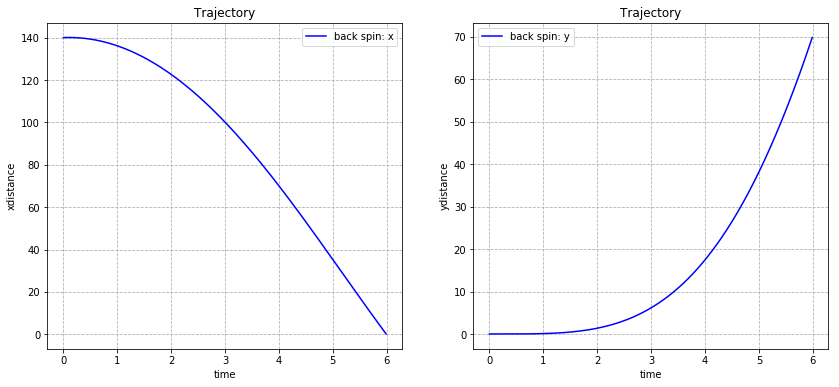

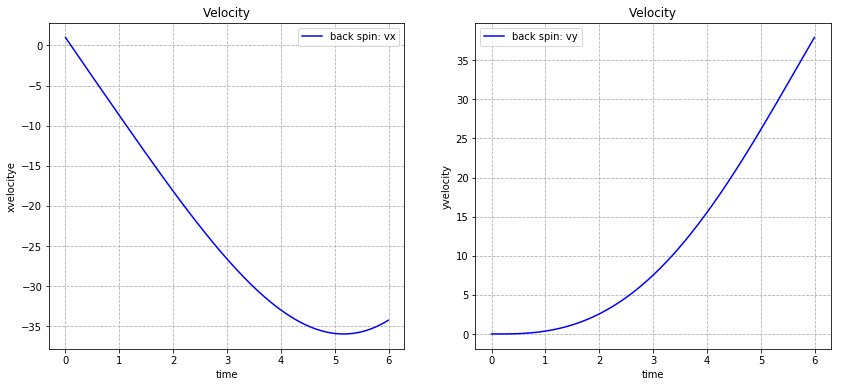

In [864]:
fig1 = plt.figure(figsize = [14,6])
ax1 = fig1.subplots(1,2)
fig2 = plt.figure(figsize = [14,6])
ax2 = fig2.subplots(1,2)

prob2a=Problem2(vx0=1,w=20)
prob2a.RK4_trajectory()

ax1[0].plot(prob2a.t_RK4, prob2a.x_RK4, "b", label = "back spin: x" )
ax1[1].plot(prob2a.t_RK4, prob2a.y_RK4, "b", label = "back spin: y")
ax2[0].plot(prob2a.t_RK4, prob2a.vx_RK4, "b", label = "back spin: vx")
ax2[1].plot(prob2a.t_RK4, prob2a.vy_RK4, "b", label = "back spin: vy")
ax1[0].grid(ls='--')
ax1[1].grid(ls='--')
ax2[0].grid(ls='--')
ax2[1].grid(ls='--')

ax1[0].set_title('Trajectory')
ax1[0].set_xlabel("time")
ax1[0].set_ylabel("xdistance")
ax1[1].set_title('Trajectory')
ax1[1].set_xlabel("time")
ax1[1].set_ylabel("ydistance")
        
ax2[0].set_title('Velocity')
ax2[0].set_xlabel("time")
ax2[0].set_ylabel("xvelocitye")
ax2[1].set_title('Velocity')
ax2[1].set_xlabel("time")
ax2[1].set_ylabel("yvelocity")

ax1[0].legend();ax1[1].legend()
ax2[0].legend();ax2[1].legend()

If we choose to rotate the ball at back-spin $20 \, rad/s$, we can have the ball travelling about $60m$ before it reaches the ground.

**Problem 2(b)**

In [595]:
class Problem2b(Particle):
    def __init__(self,m=0.6,x0=140,vx0=0,y0=0,vy0=0,z0=0,vz0=0,tf=100,dt=0.01,vc=10,w=100,A=0.0457):
        self.a=0.25
        self.b=0.25
        self.c=0.16
        self.g=9.8
        self.rho=1.25
        self.T=300
        self.vc=vc
        self.w=w
        self.A=A
        self.r=np.sqrt(self.A/np.pi)
        super().__init__(m,x0,vx0,y0,vy0,z0,vz0,tf,dt)
            
    def Cd(self, x, vx, y, vy, v, vz, t):
        v=np.sqrt(self.vx**2+self.vy**2+self.vz**2)
        kai=(v-self.vc)/4
        if (kai >=0):
            num1=self.a+self.b/(1+np.exp(kai))-self.c*np.exp(-kai**2/4)
            return num1
        else:
            num2=self.a+self.b/(1+np.exp(kai))-self.c*np.exp(-kai**2)
            return num2
        
    def CL(self, x, vx, y, vy, z, vz, t):
        v=np.sqrt(self.vx**2+self.vy**2+self.vz**2)
        num3=0.5*(self.r*self.w/v)**0.4
        return num3
        
    def Fx(self, x, vx, y, vy, z, vz, t):
        #vertical force
        v=np.sqrt(vx**2+vy**2+vz**2)
        vx_y=np.sqrt(vz**2+vy**2)
        if vx_y==0:
            cosp=0
            sinp=0
        else:        
            cosp=-vx/vx_y
            sinp=vy/vx_y
        cos0=vz/v
        sin0=vx_y/v
        Fd=0.5*self.Cd(x, vx, y, vy, z, vz, t)*self.rho*self.A*v
        FM=0.5*self.CL(x, vx, y, vy, z, vz, t)*self.rho*self.A*self.r/(self.r*self.w/v)*self.w*vx_y
        num1=-self.m*self.g+Fd*cos0
        return num1
    
    def Fy(self, x, vx, y, vy, z, vz, t):
        v=np.sqrt(vx**2+vy**2+vz**2)
        vx_y=np.sqrt(vz**2+vy**2)
        if vx_y==0:
            cosp=0
            sinp=0
        else:        
            cosp=-vx/vx_y
            sinp=vy/vx_y
        cos0=-vx/v
        sin0=vx_y/v
        Fd=0.5*self.Cd(x, vx, y, vy, z, vz, t)*self.rho*self.A*v
        FM=0.5*self.CL(x, vx, y, vy, z, vz, t)*self.rho*self.A*self.r/(self.r*self.w/v)*self.w*vx_y
        num2=-Fd*sin0*sinp+FM*cosp
        return num2
    
    def Fz(self, x, vx, y, vy, z, vz, t):
        v=np.sqrt(vx**2+vy**2+vz**2)
        vx_y=np.sqrt(vz**2+vy**2)
        if vx_y==0:
            cosp=0
            sinp=0
        else:        
            cosp=-vx/vx_y
            sinp=vy/vx_y
        cos0=-vx/v
        sin0=vx_y/v
        Fd=0.5*self.Cd(x, vx, y, vy, z, vz, t)*self.rho*self.A*v
        FM=0.5*self.CL(x, vx, y, vy, z, vz, t)*self.rho*self.A*self.r/(self.r*self.w/v)*self.w*vx_y
        num3=-Fd*sin0*cosp+FM*sinp
        return num3

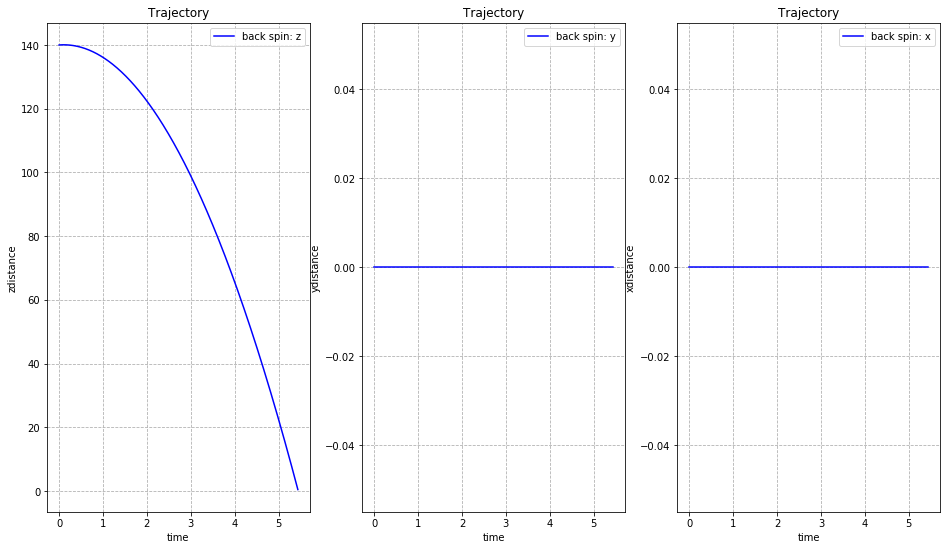

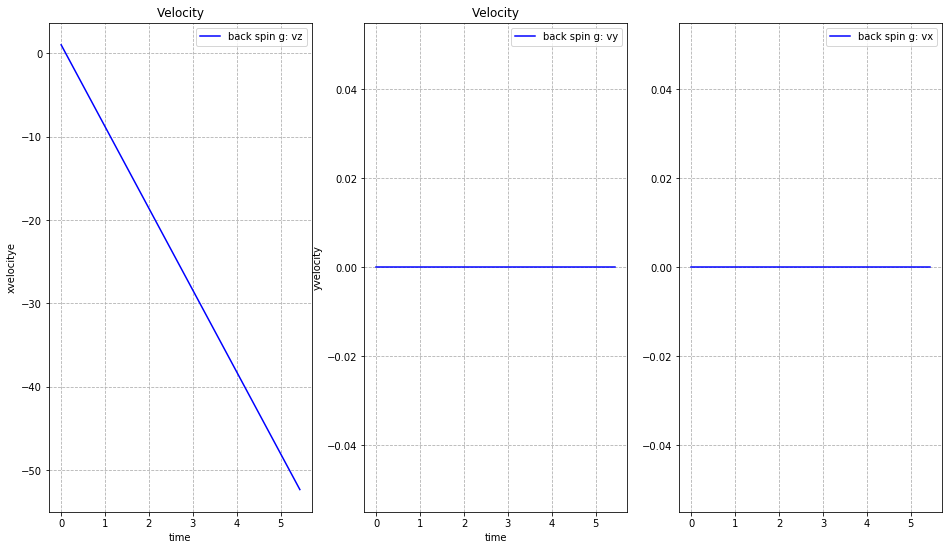

In [598]:
fig1 = plt.figure(figsize = [16,9])
ax1 = fig1.subplots(1,3)
fig2 = plt.figure(figsize = [16,9])
ax2 = fig2.subplots(1,3)

prob2b=Problem2b(vx0=1,w=100)
prob2b.RK4_trajectory()

ax1[0].plot(prob2b.t_RK4, prob2b.x_RK4, "b", label = "back spin: z" )
ax1[1].plot(prob2b.t_RK4, prob2b.y_RK4, "b", label = "back spin: y")
ax1[2].plot(prob2b.t_RK4, prob2b.z_RK4, "b", label = "back spin: x" )
ax2[0].plot(prob2b.t_RK4, prob2b.vx_RK4, "b", label = "back spin g: vz")
ax2[1].plot(prob2b.t_RK4, prob2b.vy_RK4, "b", label = "back spin g: vy")
ax2[2].plot(prob2b.t_RK4, prob2b.vz_RK4, "b", label = "back spin g: vx")
ax1[0].grid(ls='--')
ax1[1].grid(ls='--')
ax1[2].grid(ls='--')
ax2[0].grid(ls='--')
ax2[1].grid(ls='--')
ax2[2].grid(ls='--')

ax1[0].set_title('Trajectory')
ax1[0].set_xlabel("time")
ax1[0].set_ylabel("zdistance")
ax1[1].set_title('Trajectory')
ax1[1].set_xlabel("time")
ax1[1].set_ylabel("ydistance")
ax1[2].set_title('Trajectory')
ax1[2].set_xlabel("time")
ax1[2].set_ylabel("xdistance")
        
ax2[0].set_title('Velocity')
ax2[0].set_xlabel("time")
ax2[0].set_ylabel("zvelocitye")
ax2[1].set_title('Velocity')
ax2[1].set_xlabel("time")
ax2[1].set_ylabel("yvelocity")
ax2[0].set_title('Velocity')
ax2[0].set_xlabel("time")
ax2[0].set_ylabel("xvelocitye")

ax1[0].legend();ax1[1].legend();ax1[2].legend()
ax2[0].legend();ax2[1].legend();ax2[2].legend()

If the side spin ball is throw vertically, i.e. no additional $v_{x0}$ or $v_{y0}$, there will be no curve.

**Problem 2(c)**

In [868]:
#Wd=sum(Fd*dr)
prob2c=Problem2(vx0=1,w=20)
prob2c.RK4_trajectory()
v=np.sqrt(prob2c.vx_RK4**2+prob2c.vy_RK4**2)
Cd=prob2c.Cd(prob2c.x_RK4, prob2c.vx_RK4, prob2c.y_RK4, prob2c.vy_RK4, prob2c.z_RK4, prob2c.vz_RK4, prob2c.t_RK4)
Fd=0.5*Cd*prob2c.rho*prob2c.A*v
npoints=len(prob2c.t_RK4)-1
dx=[prob2c.vx_RK4[1]*prob2c.dt]
dy=[0]
dz=[0]
W=[0]
s=0
for iii in range(npoints):
    dx.append(prob2c.x_RK4[iii+1]-prob2c.x_RK4[iii])
dx=np.array(dx)
for iii in range(npoints):
    dy.append(prob2c.y_RK4[iii+1]-prob2c.y_RK4[iii])
dy=np.array(dy)
for iii in range(npoints):
    dz.append(prob2c.z_RK4[iii+1]-prob2c.z_RK4[iii])
dz=np.array(dz)
dWd=-Fd*np.sqrt(dx**2+dy**2+dz**2)
for ii in range(npoints):
    s=s+dWd[ii]
    W.append(s)
W=np.array(W)
Wd1=sum(dWd)
print('Drag force work done calculated by summing:',Wd1)

Drag force work done calculated by summing: -40.84639010537423


In [869]:
#Wd=E-Ei
Ei=prob2c.m*prob2c.g*prob2c.x_RK4[0]+1/2*prob2c.m*prob2c.vx_RK4[0]**2
E=1/2*prob2c.m*(prob2c.vx_RK4**2+prob2c.vy_RK4**2+prob2c.vz_RK4**2)+prob2c.m*prob2c.g*prob2c.x_RK4
Wd2=E[npoints]-Ei
print('Drag force work done calculated by conservation:',Wd2)

Drag force work done calculated by conservation: -39.37875266984145


From two results listed above, we can see that these two methods gives close values. The differences are due to steps.

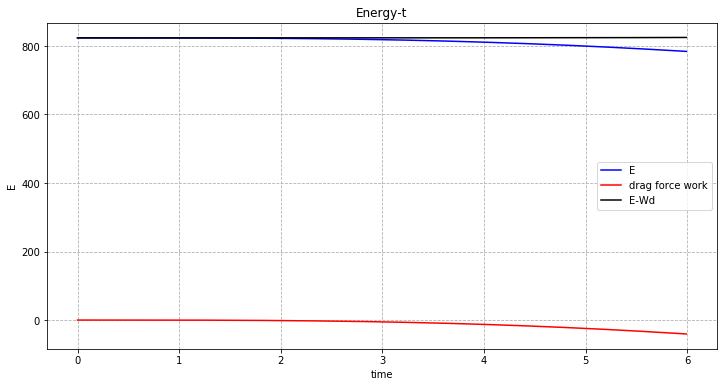

In [815]:
fig1 = plt.figure(figsize = [12,6])
ax1 = fig1.add_subplot(111)
ax1.plot(prob2c.t_RK4, E, "b", label = "E" )
ax1.plot(prob2c.t_RK4, W, "r", label = "drag force work")
ax1.plot(prob2c.t_RK4, E-W, "k", label = "E-Wd" )
ax1.grid(ls='--')
ax1.set_title('Energy-t')
ax1.set_xlabel("time")
ax1.set_ylabel("E")
ax1.legend()

Energy conservation is reserved.

**Problem 2(d)**

In [861]:
class Problem2d(Particle):
    def __init__(self,m=0.6,x0=140,vx0=0,y0=0,vy0=0,z0=0,vz0=0,tf=100,dt=0.01,vc=10,w0=100,A=0.0457):
        self.a=0.25
        self.b=0.25
        self.c=0.16
        self.g=9.8
        self.rho=1.25
        self.T=300
        self.vc=vc
        self.w=w0
        self.A=A
        self.r=np.sqrt(A/np.pi)
        super().__init__(m,x0,vx0,y0,vy0,z0,vz0,tf,dt)
        
    def omega(self, t):
        num0=self.w-0.1*self.w*self.t
        return num0               
        
    def Cd(self, x, vx, y, vy, v, vz, t):
        v=np.sqrt(self.vx**2+self.vy**2)
        kai=(v-self.vc)/4
        if (kai >=0):
            num1=self.a+self.b/(1+np.exp(kai))-self.c*np.exp(-kai**2/4)
            return num1
        else:
            num2=self.a+self.b/(1+np.exp(kai))-self.c*np.exp(-kai**2)
            return num2
        
    def CL(self, x, vx, y, vy, z, vz, t):
        v=np.sqrt(self.vx**2+self.vy**2)
        num3=0.5*(self.r*self.omega(t)/v)**0.4
        return num3
            
    def Fx(self, x, vx, y, vy, z, vz, t):
        v=np.sqrt(vx**2+vy**2)
        sin0=vy/v
        cos0=-vx/v
        Fd=0.5*self.Cd(x, vx, y, vy, z, vz, t)*self.rho*self.A*v
        FM=0.5*self.CL(x, vx, y, vy, z, vz, t)*self.rho*self.A*self.r/(self.r*self.omega(t)/v)*self.omega(t)*v 
        num3=-self.m*self.g+Fd*cos0+FM*sin0
        return num3
    
    def Fy(self, x, vx, y, vy, z, vz, t):
        v=np.sqrt(vx**2+vy**2)
        sin0=vy/v
        cos0=-vx/v
        Fd=0.5*self.Cd(x, vx, y, vy, z, vz, t)*self.rho*self.A*v
        FM=0.5*self.CL(x, vx, y, vy, z, vz, t)*self.rho*self.A*self.r/(self.r*self.omega(t)/v)*self.omega(t)*v 
        num4=-Fd*sin0+FM*cos0
        return num4


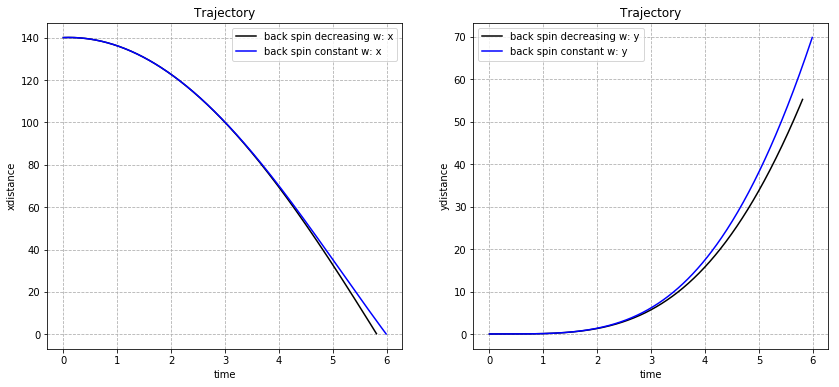

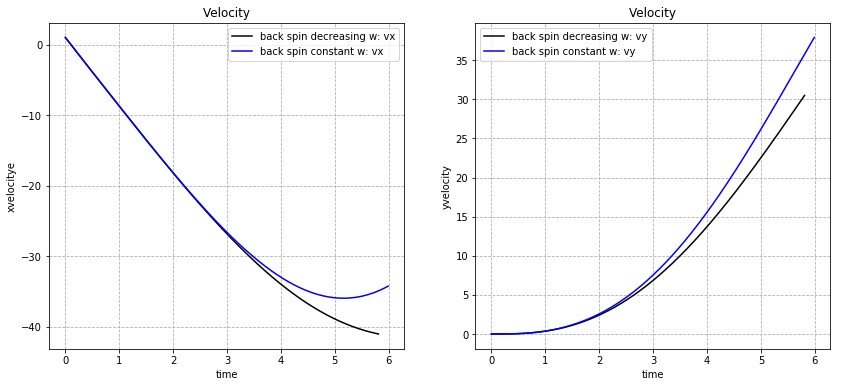

In [866]:
fig1 = plt.figure(figsize = [14,6])
ax1 = fig1.subplots(1,2)
fig2 = plt.figure(figsize = [14,6])
ax2 = fig2.subplots(1,2)

prob2d=Problem2d(vx0=1,w0=20)
prob2d.RK4_trajectory()

ax1[0].plot(prob2d.t_RK4, prob2d.x_RK4, "k", label = "back spin decreasing w: x" )
ax1[1].plot(prob2d.t_RK4, prob2d.y_RK4, "k", label = "back spin decreasing w: y")
ax2[0].plot(prob2d.t_RK4, prob2d.vx_RK4, "k", label = "back spin decreasing w: vx")
ax2[1].plot(prob2d.t_RK4, prob2d.vy_RK4, "k", label = "back spin decreasing w: vy")

prob2a=Problem2(vx0=1,w=20)
prob2a.RK4_trajectory()

ax1[0].plot(prob2a.t_RK4, prob2a.x_RK4, "b", label = "back spin constant w: x" )
ax1[1].plot(prob2a.t_RK4, prob2a.y_RK4, "b", label = "back spin constant w: y")
ax2[0].plot(prob2a.t_RK4, prob2a.vx_RK4, "b", label = "back spin constant w: vx")
ax2[1].plot(prob2a.t_RK4, prob2a.vy_RK4, "b", label = "back spin constant w: vy")
ax1[0].grid(ls='--')
ax1[1].grid(ls='--')
ax2[0].grid(ls='--')
ax2[1].grid(ls='--')

ax1[0].set_title('Trajectory')
ax1[0].set_xlabel("time")
ax1[0].set_ylabel("xdistance")
ax1[1].set_title('Trajectory')
ax1[1].set_xlabel("time")
ax1[1].set_ylabel("ydistance")
        
ax2[0].set_title('Velocity')
ax2[0].set_xlabel("time")
ax2[0].set_ylabel("xvelocitye")
ax2[1].set_title('Velocity')
ax2[1].set_xlabel("time")
ax2[1].set_ylabel("yvelocity")

ax1[0].legend();ax1[1].legend()
ax2[0].legend();ax2[1].legend()

Decreasing angular velocity will cause the ball to fall quicker to the ground.

**Problem 4(a)**

In [805]:
#Prob4
class Problem2d(Particle):
    def __init__(self,m=106*1.8*10**(-30),P=50,x0=0,vx0=0,y0=11,z0=0,vz0=0,tf=0.000001,dt=0.000000001,c=3*10**8,q=-1.6*10**(-19)):
        self.P=P*5.34*10**(-19)
        self.q=q
        Aa=P*5.34*10**(-19)/m
        self.A=Aa
        self.c=c
        v=np.sqrt(Aa**2*c**2/(Aa**2+c**2))
        self.velo=v
        super().__init__(m,x0,vx0,y0,-v,z0,vz0,tf,dt)
        
    def B_mag(self,x,y,z):
        r=np.sqrt(self.y**2+self.z**2)
        if r>11:
            self.x=-1
            return 0
        num1=4.7*4.25/r
        return num1
    
    def gamma(self,x,vx,y,vy,z,vz,t):
        num0=1/np.sqrt(1-self.velo**2/self.c**2)
        return num0
    
    def Fy(self,x,vx,y,vy,z,vz,t):
        sin0=-self.vz/self.velo
        cos0=self.vy/self.velo
        num3=-self.q*self.velo*self.B_mag(self.x,self.y,self.z)*sin0/self.gamma(x,vx,y,vy,z,vz,t)
        return num3
    
    def Fz(self,x,vx,y,vy,z,vz,t):
        sin0=-self.vz/self.velo
        cos0=self.vy/self.velo
        num4=-self.q*self.velo*self.B_mag(self.x,self.y,self.z)*cos0/self.gamma(x,vx,y,vy,z,vz,t)
        return num4
        

Momentum=50GeV/c muon is bent -0.6935685607277005 rad
Momentum=100GeV/c muon is bent -0.4250820626107159 rad
Momentum=500GeV/c muon is bent -0.12317725412264564 rad
Momentum=1000GeV/c muon is bent -0.06684783978396663 rad


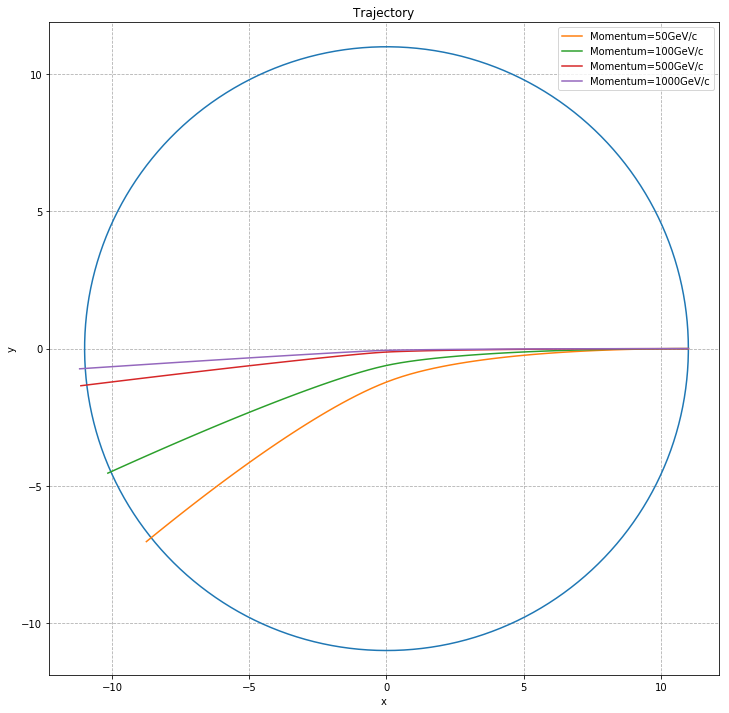

In [806]:
Mom=[50,100,500,1000]
thet = np.arange(0, 2*np.pi, 0.01)
x1 = 11* np.cos(thet)
y1 = 11* np.sin(thet) 
fig1 = plt.figure(figsize = [12,12])
ax1 = fig1.add_subplot(111)
ax1.plot(x1, y1)
cigma=[]
for i in range(4):
    P1=Problem2d(P=Mom[i])
    P1.RK4_trajectory()
    npo=len(P1.t_RK4)-1
    cigma.append(np.arcsin(P1.z_RK4[npo]/11))
    ax1.plot(P1.y_RK4,P1.z_RK4, label = "Momentum={}GeV/c".format(Mom[i]) )
ax1.grid(ls='--')
ax1.set_title('Trajectory')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
ax1.axis('equal')

for ii in range(4):
    print('Momentum={}GeV/c muon is bent {} rad'.format(Mom[ii],cigma[ii]))

Truncation error for RK4 is of order($h^5$). 